# Team 4 Final Project Code
Dataset: Diabetes Prediction Dataset [from Kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download) \
Team Members: Shailja Somani, Roger Qiu, & Ue Wang\
Course: ADS-504: Machine Learning & Deep Learning for Data Science

## Setup/Imports

In [ ]:
# Import necessary packages
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
import random
from sklearn.feature_selection import RFECV

In [ ]:
# Set all random seeds to 42 for Keras neural network later
seed_value = 42

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

## UE Wang - EDA

In [ ]:
diabetes_data = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
diabetes_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
diabetes_data['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

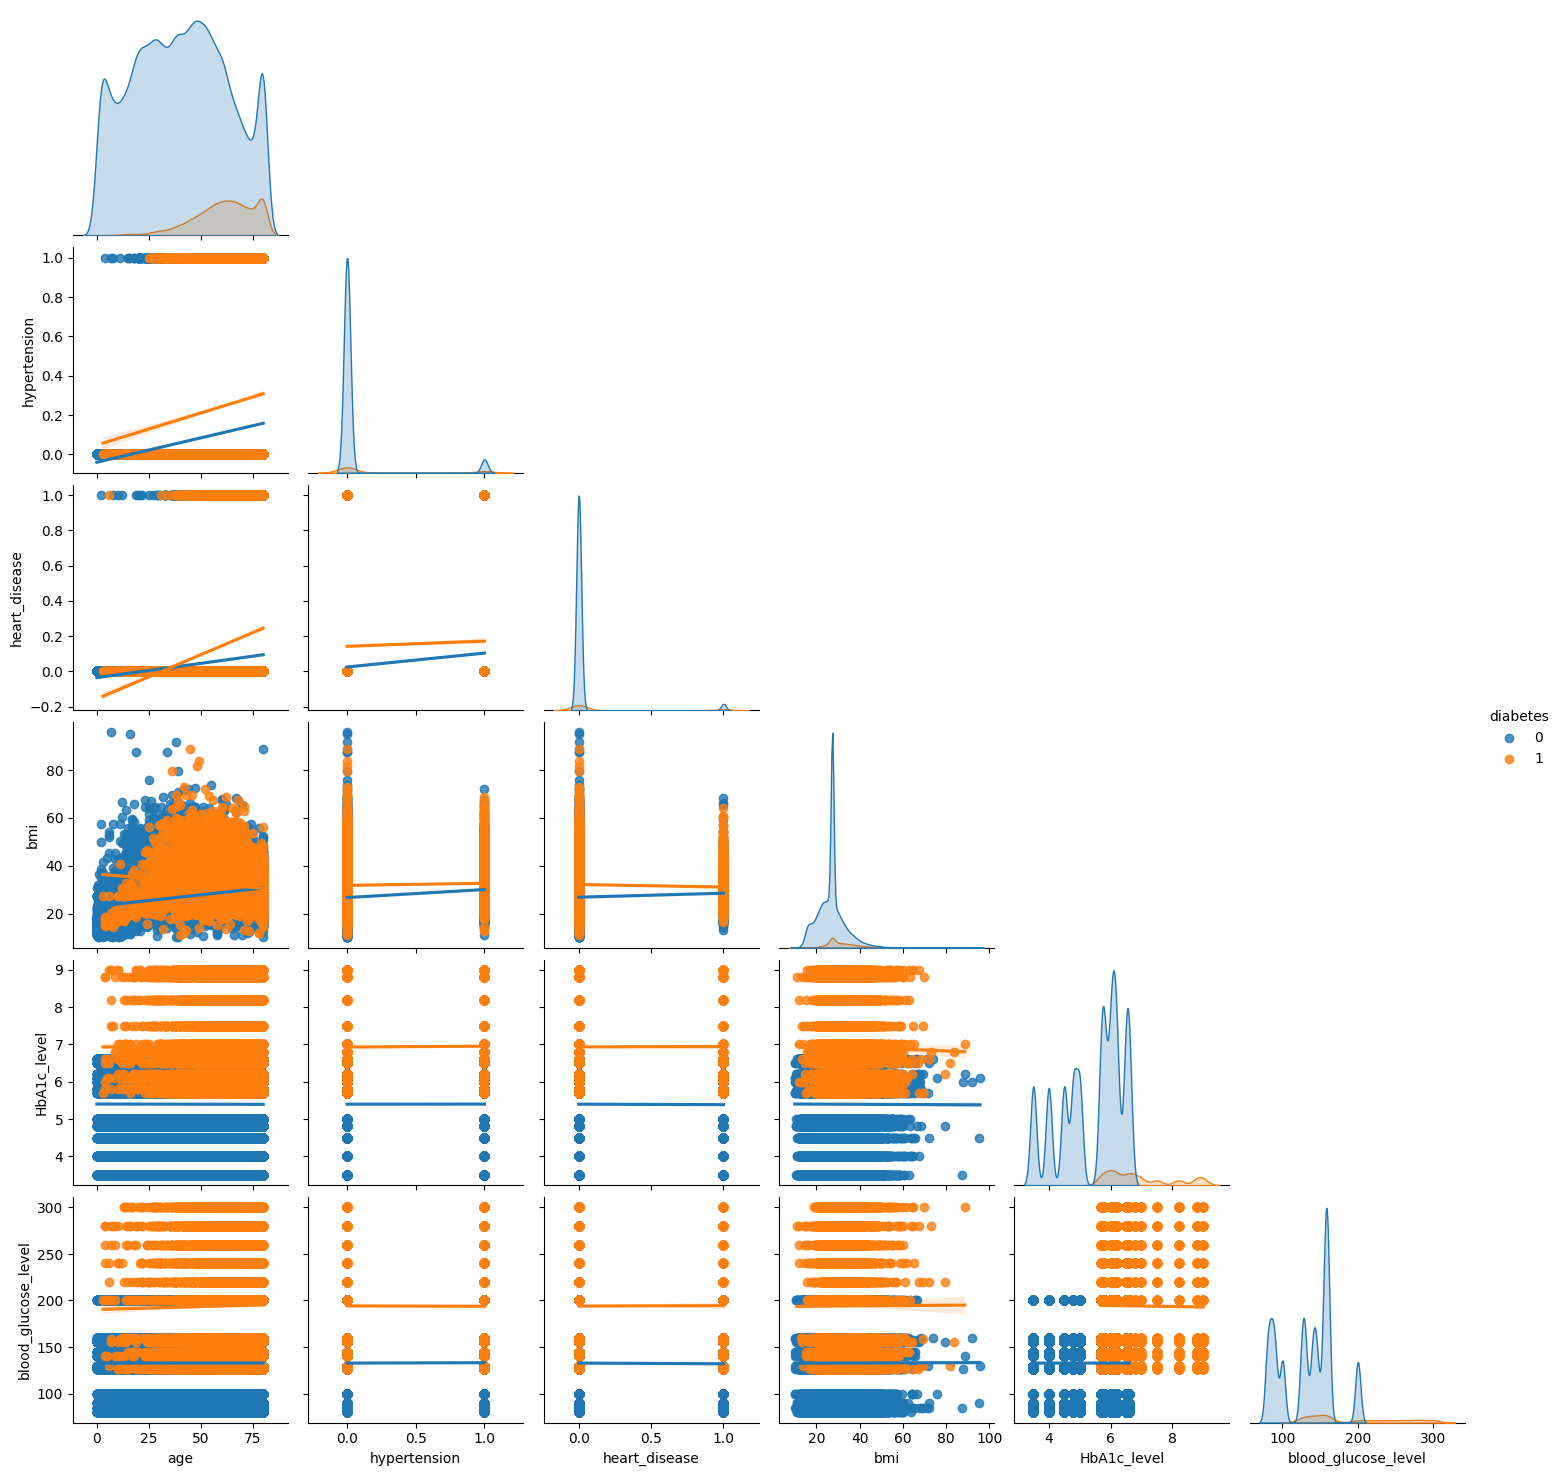

In [ ]:
sns.pairplot(diabetes_data, hue="diabetes", corner=True, kind='reg')

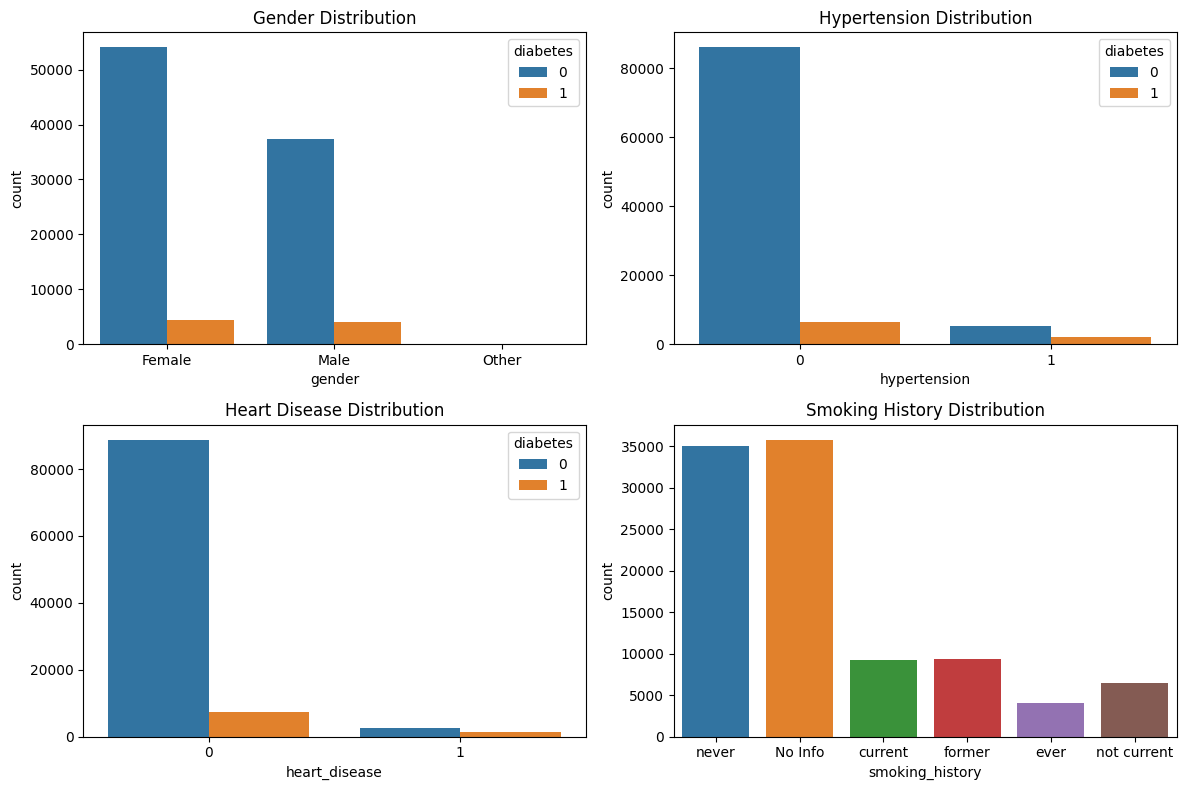

In [ ]:
# Create a figure with two rows and two columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the binary variables
sns.countplot(x='gender', hue='diabetes', data=diabetes_data, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

sns.countplot(x='hypertension', hue='diabetes', data=diabetes_data, ax=axes[0, 1])
axes[0, 1].set_title('Hypertension Distribution')

sns.countplot(x='heart_disease', hue='diabetes', data=diabetes_data, ax=axes[1, 0])
axes[1, 0].set_title('Heart Disease Distribution')

# Plot the 'smoking_history' distribution as a bar plot
sns.countplot(x='smoking_history', data=diabetes_data, ax=axes[1, 1])
axes[1, 1].set_title('Smoking History Distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-24-d89aa2451eee>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['age'], ax=axes[0])
<ipython-input-24-d89aa2451eee>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['bmi'], ax=axes[1])
<ipython-input-24-d89aa2451eee>:13: UserWarning: 

`distplot` is a

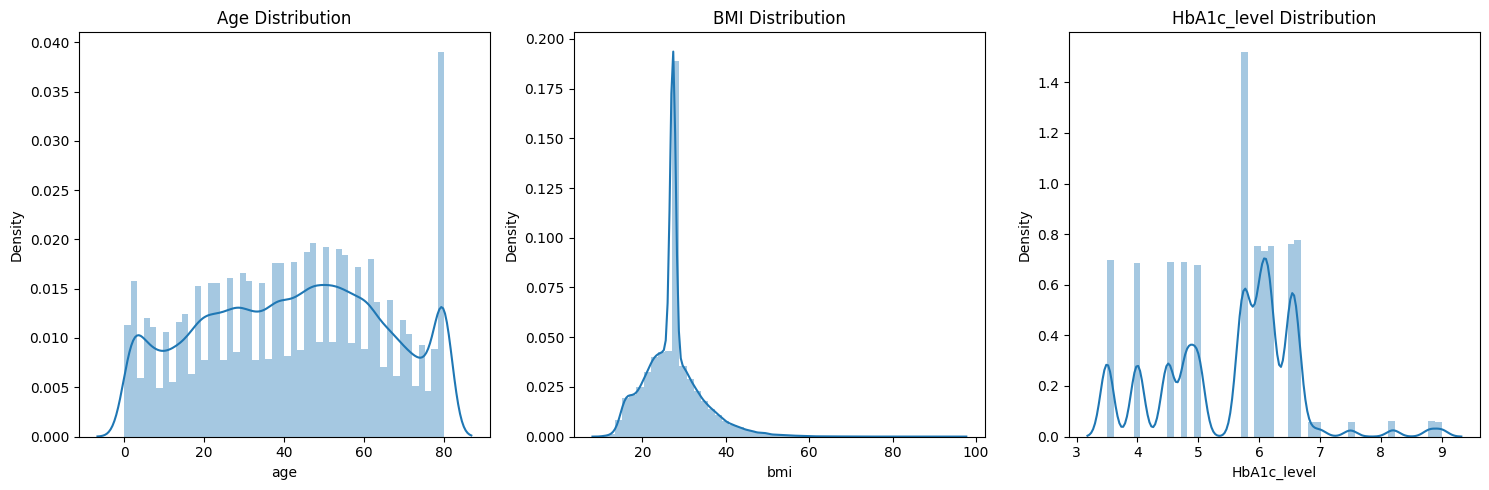

In [ ]:
# Create a figure with three subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first distribution on the first subplot
sns.distplot(diabetes_data['age'], ax=axes[0])
axes[0].set_title('Age Distribution')

# Plot the second distribution on the second subplot
sns.distplot(diabetes_data['bmi'], ax=axes[1])
axes[1].set_title('BMI Distribution')

# Plot the third distribution on the third subplot
sns.distplot(diabetes_data['HbA1c_level'], ax=axes[2])
axes[2].set_title('HbA1c_level Distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

BMI / HbA1c Level / Blood Glucose Level by Diabetes


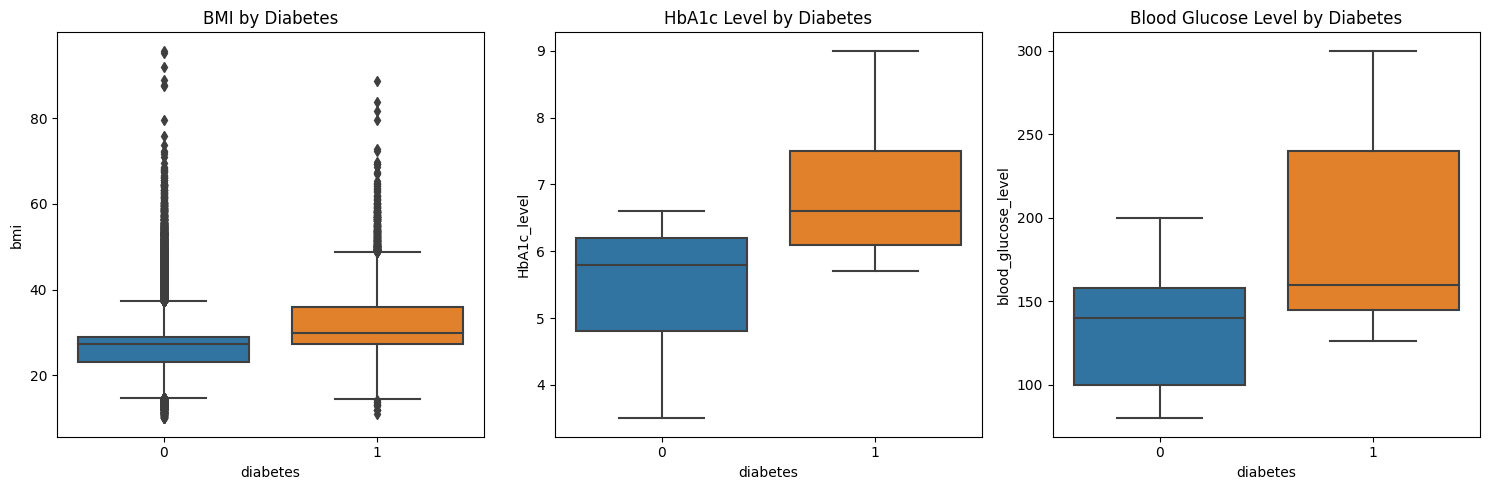

In [ ]:
# Create the three box plots side by side in one cell
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first box plot
sns.boxplot(data=diabetes_data, x="diabetes", y="bmi", ax=axes[0])
axes[0].set_title("BMI by Diabetes")

# Plot the second box plot
sns.boxplot(data=diabetes_data, x="diabetes", y="HbA1c_level", ax=axes[1])
axes[1].set_title("HbA1c Level by Diabetes")

# Plot the third box plot
sns.boxplot(data=diabetes_data, x="diabetes", y="blood_glucose_level", ax=axes[2])
axes[2].set_title("Blood Glucose Level by Diabetes")

# Adjust spacing between subplots to prevent title and axis label overlap
plt.tight_layout()

# Display the graphs
plt.show()


scatterplot between age, diabetes, and BMI/blood glucose/ HbA1c Level

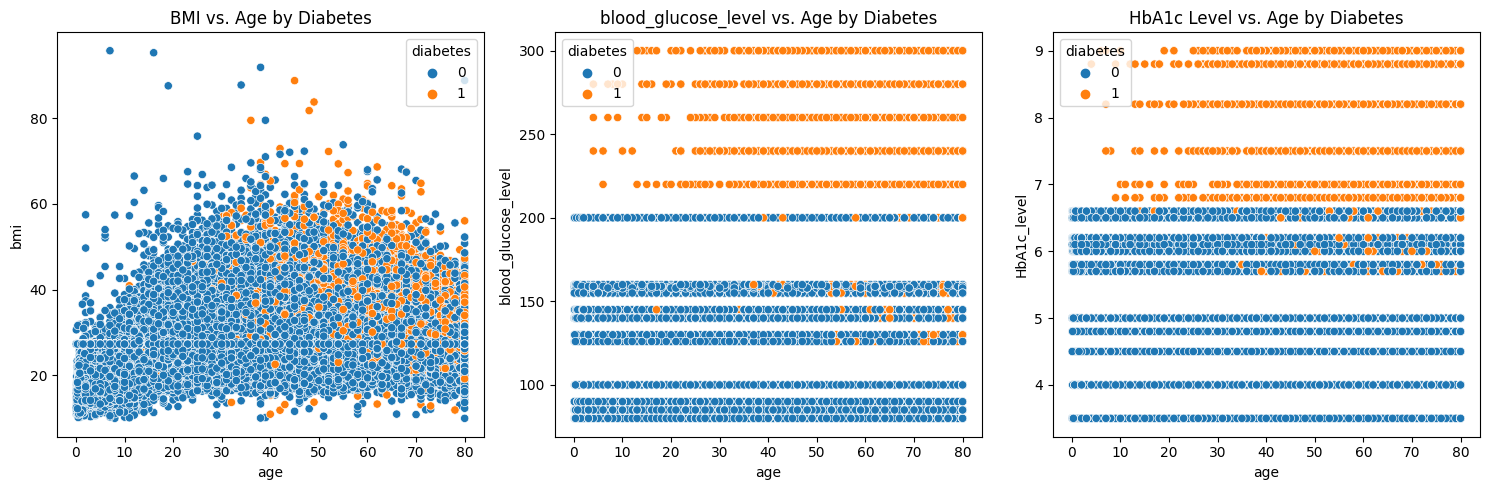

In [ ]:
# Create the three scatter plots in one column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first scatter plot
sns.scatterplot(data=diabetes_data, x="age", y="bmi", hue="diabetes", ax=axes[0])
axes[0].set_title("BMI vs. Age by Diabetes")

# Plot the second scatter plot
sns.scatterplot(data=diabetes_data, x="age", y="blood_glucose_level", hue="diabetes", ax=axes[1])
axes[1].set_title("blood_glucose_level vs. Age by Diabetes")

# Plot the third scatter plot
sns.scatterplot(data=diabetes_data, x="age", y="HbA1c_level", hue="diabetes", ax=axes[2])
axes[2].set_title("HbA1c Level vs. Age by Diabetes")

# Adjust spacing between subplots to prevent title and axis label overlap
plt.tight_layout()

# Display the graphs
plt.show()


Feature-specific Heatmaps

<ipython-input-26-9ecdd5e58ea3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diabetes_data.corr(), annot=True)


<Axes: >

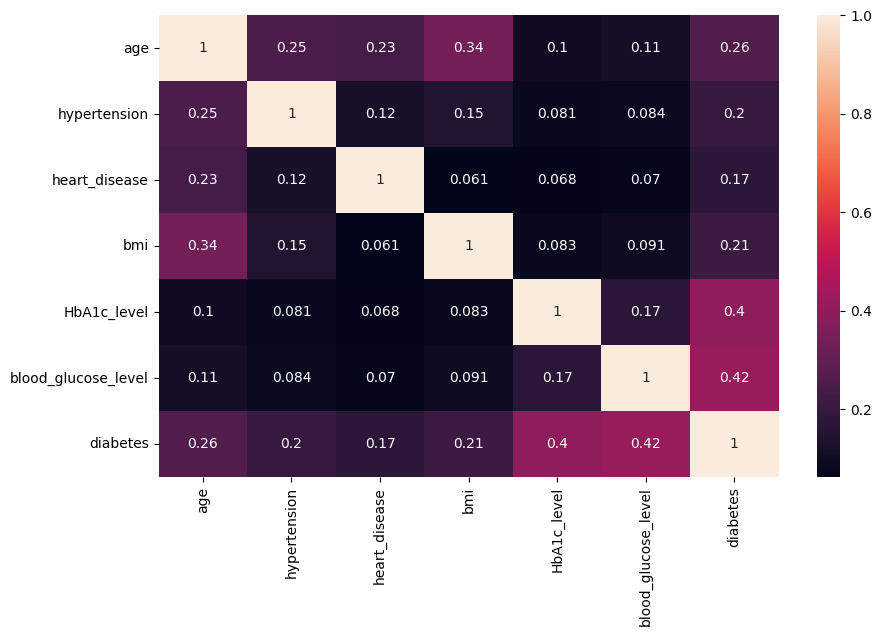

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(diabetes_data.corr(), annot=True)

## Roger Qiu - Pre-Processing and Model Building Part 1

In [ ]:
diabetes_data = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#### Pre-processing

In [ ]:
# drop the smoking history field
diabetes_data = diabetes_data.drop(columns = 'smoking_history')
diabetes_data.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


For the smoking history field, as displayed earlier, about 35% of the values are "No info". Since this does not add meaningful info and can't be accurately imputed, it was dropped from the dataframe.

In [ ]:
# convert gender field to numerical using one hot encoding
diabetes_data = pd.get_dummies(diabetes_data, columns=['gender'])
diabetes_data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0


Because genders are not ordinal, rather than using label encoding, we use one hot encoding to create the 2 numerical fields.

In [ ]:
# check count of diabetes
diabetes_data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [ ]:
# Create X and y for features and labels
X = diabetes_data.drop('diabetes', axis=1)
y = diabetes_data['diabetes']

print(X.head())
print(y.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   gender_Female  gender_Male  gender_Other  
0              1            0             0  
1              1            0             0  
2              0            1             0  
3              1            0             0  
4              0            1             0  
0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64


In [ ]:
# check count of diabetes
y.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

Since people with diabets only account for 8.5% of the labels, there is a class imbalance, so we will need to use a stratified train test split so the proportion of values will be the same as current in the labels.

In [ ]:
# Split the data into a 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 9)
(30000, 9)
(70000,)
(30000,)


Since we have 100,000 records of data, we can use split the data into training and testing sets instead of using cross validation.

In [ ]:
# scale the features using standard scaler
scaler = StandardScaler()

# fit the scaler with training data only
X_train_scaled = scaler.fit_transform(X_train)

# transform the test data
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 6.23756907e-01, -2.85186926e-01,  4.92468529e+00,
         1.83574593e+00, -1.43036204e+00, -9.36894845e-01,
         8.41690053e-01, -8.41368087e-01, -1.36289685e-02],
       [ 9.78815825e-01, -2.85186926e-01, -2.03058661e-01,
         1.55163673e-04,  1.00027997e+00, -1.18324663e+00,
        -1.18808580e+00,  1.18854044e+00, -1.36289685e-02],
       [ 3.13080353e-01, -2.85186926e-01, -2.03058661e-01,
         2.24984557e+00,  4.39362582e-01,  2.51203015e+00,
        -1.18808580e+00,  1.18854044e+00, -1.36289685e-02],
       [ 1.15634528e+00, -2.85186926e-01, -2.03058661e-01,
         1.55163673e-04, -6.82472190e-01, -1.30642252e+00,
        -1.18808580e+00,  1.18854044e+00, -1.36289685e-02],
       [ 8.90051095e-01, -2.85186926e-01, -2.03058661e-01,
         5.00086366e-01,  1.58903889e-01,  1.71688190e-01,
        -1.18808580e+00,  1.18854044e+00, -1.36289685e-02]])

Create a scaled version of X train and X test for Logistic Regression and KNN. These 2 models create more accurate predictions when features are on the same scale.

#### Logistic Regression

In [ ]:
# create a logistic regression model
model = LogisticRegression()

# train model with scaled features and labels
model.fit(X_train_scaled, y_train)

# use the model to make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# check first 5 predictions
y_pred[:5]

array([0, 0, 0, 0, 0])

In [ ]:
# create classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# get the AUC score
auc_score = roc_auc_score(y_test, y_pred)

print("AUC score:")
print(auc_score)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27450
           1       0.85      0.63      0.73      2550

    accuracy                           0.96     30000
   macro avg       0.91      0.81      0.85     30000
weighted avg       0.96      0.96      0.96     30000

AUC score:
0.8122275795564127


Precision is the correctly predicted positive instances to the total predicted positive labels. So a precision of .88 means that the model was correct 88% of the time it predicted the positive class. This is the amount of people that the model predicted to have diabetes did have diabetes.

Recall or sensitivity is the correctly predicted positive instances to all actual positive labels. A recall of 0.63 means that the model correctly found 63% of all actual positive diabetes instances. So out of all the people with diabetes, the model only found 63% of them.

Accuracy is .96 but due to class imbalance, this is not a great metric to evaluate.

AUC scores are better to get an understanding of the models trade off between true positives (recall) and false positives (1 - specificity) at each threshold.

Our AUC of .81 tells us it is an acceptable classifier in distinguishing between positive and negative cases. The higher this score the better, an AUC of 1 is a perfect model and 0.5 is as good as a random model.

In [ ]:
# create a confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(matrix)

Confusion matrix:
[[27174   276]
 [  932  1618]]


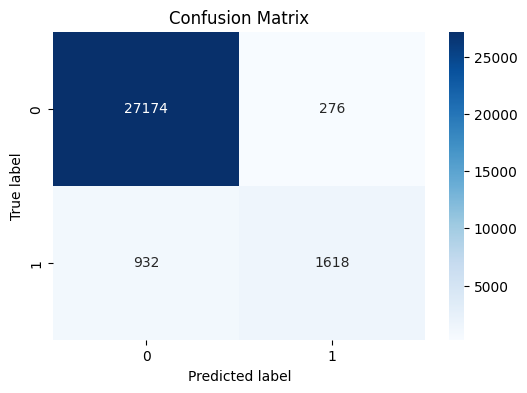

In [ ]:
# create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

# add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

From the confusion matrix:

The top left is True Negatives, these are the instances were the model correctly predicted negative for diabetes: 27,995

The top right is is the False Positives, where the model incorrectly predicted the positive class: 217

The bottom left is the False Negatives, the model incorrectly predicted the negative class: 952

The bottom right is the True Positives, these are the cases where the model correctly predicted the positive class: 1598



#### Decision Trees

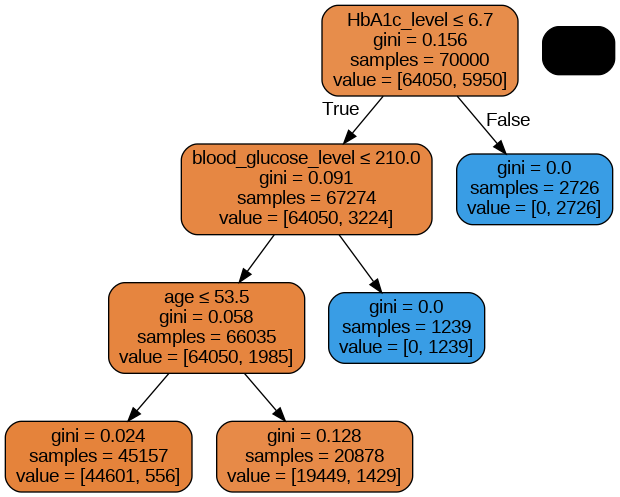

In [ ]:
# create a decision tree classifier with max depth of 3, sqrt of the 9 features
model = DecisionTreeClassifier(max_depth=3)

# train model with features and labels
model.fit(X_train, y_train)

# use the model to make predictions on the test data
y_pred = model.predict(X_test)

# visualize the tree
dot_data = export_graphviz(model, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

This Decision tree with a depth of 3 can be used to classify individuals based on the values of features. We start at the root node, the HbA1c level and work your way down to the leaf nodes based on the features.

Gini: measurement of misclassification, the lower the better, used to decide the best split at each node.

Samples: count of records that flow to each node

Value: classes in the samples, left negative, right is positive for diabetes

In [ ]:
# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_test, y_pred)

print("AUC score:")
print(auc_score)

AUC score:
0.8376470588235294


In [ ]:
# create a confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(matrix)

Confusion matrix:
[[27450     0]
 [  828  1722]]


#### Random Forest

In [ ]:
# create a random forest classifier
model = RandomForestClassifier()

# train model with features and labels
model.fit(X_train, y_train)

# create predictions using test data
y_pred = model.predict(X_test)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_test, y_pred)

print("AUC score:")
print(auc_score)

AUC score:
0.8452930461802207


In [ ]:
# create a confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(matrix)

Confusion matrix:
[[27310   140]
 [  776  1774]]


In [ ]:
# get feature importance
importance = model.feature_importances_

# print important next to the column names
importance_series = pd.Series(importance, index=X_train.columns)
print(importance_series.sort_values(ascending=False))

HbA1c_level            4.093465e-01
blood_glucose_level    3.232448e-01
bmi                    1.348862e-01
age                    1.036836e-01
hypertension           1.582424e-02
heart_disease          7.694849e-03
gender_Female          2.686388e-03
gender_Male            2.632801e-03
gender_Other           5.636706e-07
dtype: float64


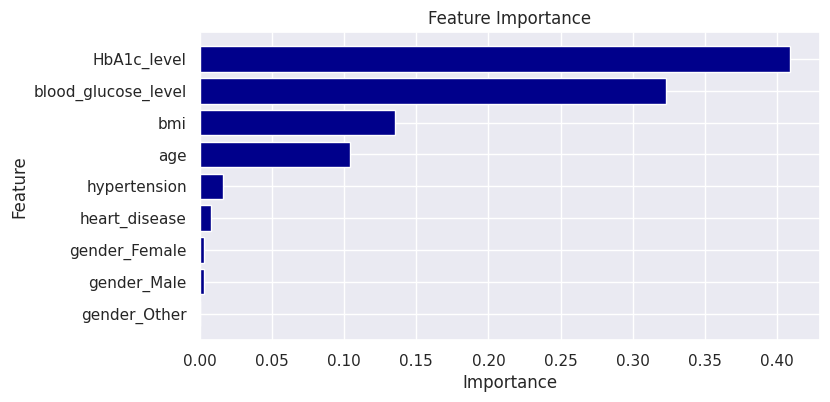

In [ ]:
# sort feature importances in descending order
sorted_importances = importance_series.sort_values(ascending=False)

# create a bar plot
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
plt.barh(sorted_importances.index, sorted_importances.values, color='darkblue')

# invert y-axis so that features with highest importance are at the top
plt.gca().invert_yaxis()

# add labels and title
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

Here we can see how important each feature is in determining the outcome of the predictions

#### K-Nearest Neighbors

In [ ]:
# create a KNN classifier
model = KNeighborsClassifier()

# train model with scaled features and labels
model.fit(X_train_scaled, y_train)

# use the model to make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_test, y_pred)

print("AUC score:")
print(auc_score)

AUC score:
0.8219747133826207


In [ ]:
# create a confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(matrix)

Confusion matrix:
[[27257   193]
 [  890  1660]]


In [ ]:
# check how many neighbors our model used to make its predictions
print(f"neighbors: {model.n_neighbors}")

neighbors: 5


That means our model used the 5 training records that were closest to it in euclidean distance. This is where scaling the data before hand is important. Now lets see how our accuracy changes as we range through the different possible k values.

In [ ]:
# list for the auc scores for each value of k
auc_scores = []

# range from 1 to 10
k_values = np.arange(1, 10)

# for each k, train a KNN model and get the accuracy
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    auc = roc_auc_score(y_test, y_pred)
    auc_scores.append(auc)

print(auc_scores)

[0.8381238615664844, 0.8123240115718419, 0.827494910532519, 0.8103675131254688, 0.8219747133826207, 0.8091449694631953, 0.818033858352084, 0.8086660237865637, 0.8156712739740706]


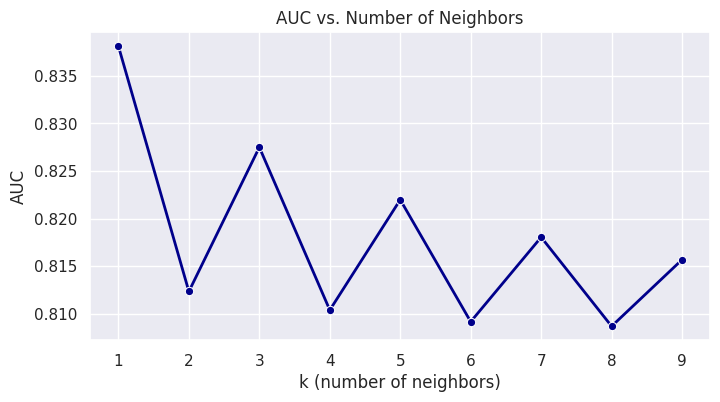

In [ ]:
# plot auc scores
plt.figure(figsize=(8,4))
sns.set_theme(style='darkgrid')  # use seaborn's darkgrid theme
sns.lineplot(x=k_values, y=auc_scores, marker='o', linewidth=2, color='darkblue')
plt.xlabel('k (number of neighbors)')
plt.ylabel('AUC')
plt.title('AUC vs. Number of Neighbors')
plt.grid(True)
plt.show()

#### Hyperparameter tuning with GridSearchCV

In [ ]:
# set the models and their parameters to loop over
models = [
    ('Logistic Regression', LogisticRegression(random_state=42), X_train_scaled, X_test_scaled, {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2'],
    }),
    ('Decision Tree', DecisionTreeClassifier(random_state=42), X_train, X_test, {
        'max_depth': [None, 5, 10, 15, 20],
    }),
    ('Random Forest', RandomForestClassifier(random_state=42), X_train, X_test, {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 5, 10, 15, 20],
    }),
    ('KNN', KNeighborsClassifier(), X_train_scaled, X_test_scaled, {
        'n_neighbors': [3, 5, 7, 9, 11],
    }),
]

# Store the best models and their scores
best_models = {}
best_scores = {}
best_params = {}

For the parameters of Logistic Regression:
C: Regularization to prevent overfitting by penalizing highly correlated features.
Penalty: use Lasso or Ridge penatly type.

Decision Tree:
Depth: number of nodes to use, higher amounts can lead to overfitting and variance, lower can lead to underfitting and bias.

Random Forest:
estimators: number of trees in the forest, more can be more accuracy but requires more computation and possible overfitting
depth: same as decision trees.

KNN:
neighbors: number of training records that were closest to the testing records in euclidean distance. Higher number can cause underfitting and smaller can cause overfitting.

In [ ]:
# perform Grid Search for each model, use x train and x test
# use 5 fold cross validation and then test on each generated y_train
for name, model, X_train, X_test, params in models:
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)

    # store the best model, score, and parameters
    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_
    best_params[name] = grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
# Print the best models, scores, and parameters for each
for name in best_models:
    print(f"Best {name} model: {best_models[name]}")
    print(f"Best auc score: {best_scores[name]}")
    print(f"Best parameters: {best_params[name]}\n")

Best Logistic Regression model: LogisticRegression(C=0.01, random_state=42)
Best auc score: 0.9610922008147522
Best parameters: {'C': 0.01, 'penalty': 'l2'}

Best Decision Tree model: DecisionTreeClassifier(max_depth=10, random_state=42)
Best auc score: 0.973206043072967
Best parameters: {'max_depth': 10}

Best Random Forest model: RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)
Best auc score: 0.9747640302022449
Best parameters: {'max_depth': 15, 'n_estimators': 200}

Best KNN model: KNeighborsClassifier(n_neighbors=11)
Best auc score: 0.9340573540891768
Best parameters: {'n_neighbors': 11}



For the grid search, the most accurate predictions come from the Random Forest model where the depth is 10 and estimators is 50.

## Shailja Somani - Training Dataset Balancing and Model Building Part 2

### Balance Training Dataset via SMOTE

Before: Counter({0: 64050, 1: 5950})


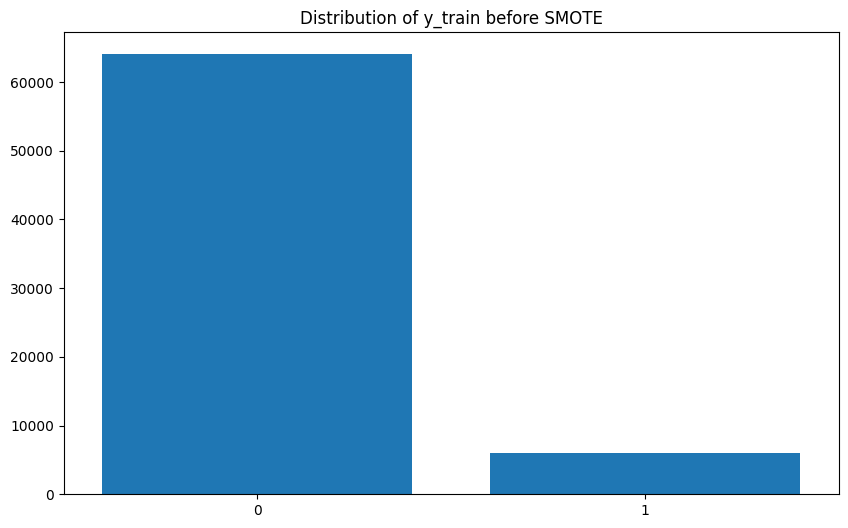

In [ ]:
# Try balancing training data to see if it improves results
# Check distribution of target variable before using SMOTE
counter = Counter(y_train)
print("Before:", counter)
plt.figure(figsize=(10, 6))
plt.bar(counter.keys(), counter.values(), tick_label=[0, 1])
plt.title('Distribution of y_train before SMOTE')
plt.xlim(-0.5, 1.5)
plt.xticks([0, 1])
plt.show()

In [ ]:
# Implement SMOTE
smote = SMOTE(random_state = 42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

After: Counter({0: 64050, 1: 64050})


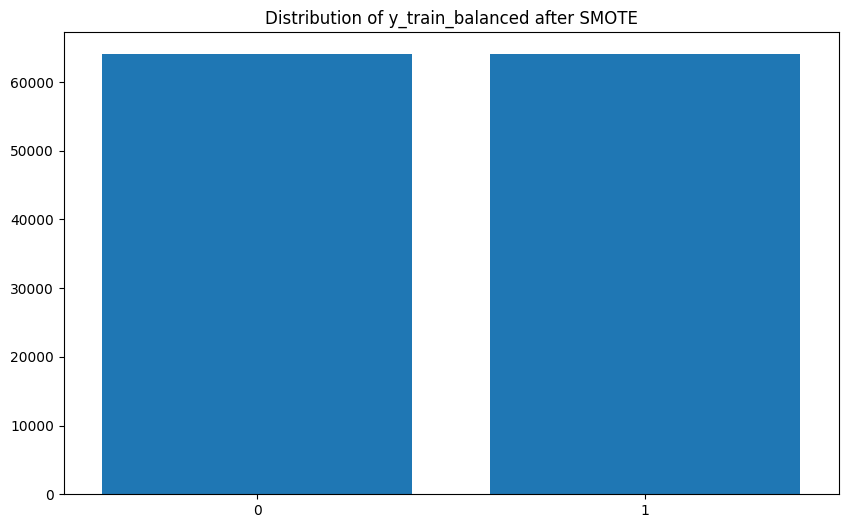

In [ ]:
# Check distribution of target variable after oversampling
counter = Counter(y_train_balanced)
print("After:", counter)
plt.figure(figsize=(10, 6))
plt.bar(counter.keys(), counter.values(), tick_label=[0, 1])
plt.title('Distribution of y_train_balanced after SMOTE')
plt.xlim(-0.5, 1.5)
plt.xticks([0, 1])
plt.show()

### Modeling & Hyperparam Tuning on Balanced Training Dataset

#### Re-run Previous GridSearchCV on Balanced Dataset

In [ ]:
# Loop through same models & hyperparameters as earlier
models = [
    ('Logistic Regression', LogisticRegression(random_state=42), {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2'],
    }),
    ('Decision Tree', DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 5, 10, 15, 20],
    }),
    ('Random Forest', RandomForestClassifier(random_state=42), {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 5, 10, 15, 20],
    }),
    ('KNN', KNeighborsClassifier(), {  # KNN does not have a random_state parameter
        'n_neighbors': [3, 5, 7, 9, 11],
    }),
]

In [ ]:
# Perform Grid Search CV for above models again using balanced training dataset
# use 5 fold cross validation and then test on each generated y_train
for name, model, params in models:
    grid = GridSearchCV(model, params, cv=5, scoring='roc_auc')
    grid.fit(X_train_balanced, y_train_balanced)
    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_
    best_params[name] = grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Logistic Regression: Best Score = 0.9626108512024356
Best Parameters = {'C': 0.01, 'penalty': 'l2'}
Decision Tree: Best Score = 0.984059242724233
Best Parameters = {'max_depth': 15}
Random Forest: Best Score = 0.997860338545523
Best Parameters = {'max_depth': None, 'n_estimators': 200}
KNN: Best Score = 0.9860381867698258
Best Parameters = {'n_neighbors': 11}


In [ ]:
# Print the best scores and the best parameters for each model on the balanced dataset
for name in best_models:
    print(f"{name}: Best Score = {best_scores[name]}")
    print(f"Best Parameters = {best_params[name]}\n")

Logistic Regression: Best Score = 0.9626108512024356
Best Parameters = {'C': 0.01, 'penalty': 'l2'}

Decision Tree: Best Score = 0.984059242724233
Best Parameters = {'max_depth': 15}

Random Forest: Best Score = 0.997860338545523
Best Parameters = {'max_depth': None, 'n_estimators': 200}

KNN: Best Score = 0.9860381867698258
Best Parameters = {'n_neighbors': 11}



#### AdaBoost & Hyperparam Tuning

In [ ]:
# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Initialize the model
model = AdaBoostClassifier(random_state=42)

# Initialize & fit GridSearchCV with 'roc_auc' as the scoring metric
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train_balanced, y_train_balanced)

# Print out the best parameters & score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)



Best Parameters:  {'learning_rate': 1, 'n_estimators': 200}
Best Score:  0.9947682226451451


#### XGBoost Build & Hyperparam Tuning

In [ ]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the model
model = XGBClassifier(eval_metric='logloss', random_state=42)

# Initialize & fit GridSearchCV with 'roc_auc' as the scoring metric
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train_balanced, y_train_balanced)

# Print out the best parameters & score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)



Best Parameters:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Best Score:  0.9978199065060047


#### Neural Network Build & Hyperparam Tuning Tuning

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam', neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_balanced.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # binary classification
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.AUC(name='roc_auc')])
    return model

# The below is commented out as is was too computationally-intensive to run.
# Hyperparameters are explored in the cells below
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
'''
nnet = [('Neural Network', KerasClassifier(build_fn=create_model, verbose=0), X_train_scaled, X_test_scaled, {
    'batch_size': [10, 40, 80],
    'epochs': [20, 50, 100],
    'optimizer': ['SGD', 'RMSprop', 'Adagrad'],
    'neurons': [10, 30, 50]
})]
'''

"\nnnet = [('Neural Network', KerasClassifier(build_fn=create_model, verbose=0), X_train_scaled, X_test_scaled, {\n    'batch_size': [10, 40, 80],\n    'epochs': [20, 50, 100],\n    'optimizer': ['SGD', 'RMSprop', 'Adagrad'],\n    'neurons': [10, 30, 50]\n})]\n"

In [ ]:
# Explore batch size
nnet_batch = [('Neural Network', KerasClassifier(build_fn=create_model, verbose=0), X_train_balanced, X_test_scaled, {
    'batch_size': [10, 40, 80],
})]

# Retrieve the model and its parameters
name, model, _, _, params = nnet_batch[0]

# GridSearchCV - only 3 CVs because neural networks are computationally intensive
grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='roc_auc', cv=cv)
grid_result = grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best score & parameters
print("Best Parameters: ", grid_result.best_params_)
print("Best AUC: ", grid_result.best_score_)

<ipython-input-22-1d6895d57ab5>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nnet_batch = [('Neural Network', KerasClassifier(build_fn=create_model, verbose=0), X_train_balanced, X_test_scaled, {


1335/1335 [==============================] - 2s 2ms/step
Best Parameters:  {'batch_size': 10}
Best AUC:  0.9682264631517752


In [ ]:
# Explore epochs
nnet_epochs = [('Neural Network', KerasClassifier(build_fn=create_model, verbose=0), X_train_balanced, X_test_scaled, {
    'batch_size': [10],
    'epochs': [1, 20, 50, 100],
})]

# Retrieve the model and its parameters
name, model, _, _, params = nnet_epochs[0]

# GridSearchCV - only 3 CVs because neural networks are computationally intensive
grid = GridSearchCV(estimator=model, param_grid=params, cv=cv)
grid_result = grid.fit(X_train_balanced, y_train_balanced)

# Print the best score & parameters
print("Best Parameters: ", grid_result.best_params_)
print("Best AUC: ", grid_result.best_score_)

<ipython-input-15-5a2c5250ce0d>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nnet_epochs = [('Neural Network', KerasClassifier(build_fn=create_model, verbose=0), X_train_balanced, X_test_scaled, {


Best Parameters:  {'batch_size': 10, 'epochs': 100}
Best AUC:  0.9128337105115255


In [ ]:
# Explore optimizer
nnet_optimizer = [('Neural Network', KerasClassifier(build_fn=create_model, verbose=0), X_train_balanced, X_test_scaled, {
    'batch_size': [10],
    'epochs': [100],
    'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'adam']
})]

# Retrieve the model and its parameters
name, model, _, _, params = nnet_optimizer[0]

# GridSearchCV - only 3 CVs because neural networks are computationally intensive
grid = GridSearchCV(estimator=model, param_grid=params, cv=cv)
grid_result = grid.fit(X_train_balanced, y_train_balanced)

# Print the best score & parameters
print("Best Parameters: ", grid_result.best_params_)
print("Best AUC: ", grid_result.best_score_)

<ipython-input-11-90e3ef78cff4>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nnet_optimizer = [('Neural Network', KerasClassifier(build_fn=create_model, verbose=0), X_train_balanced, X_test_scaled, {


Best Parameters:  {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam'}
Best AUC:  0.912802497545878


In [ ]:
# Explore neurons
nnet_neurons = [('Neural Network', KerasClassifier(build_fn=create_model, verbose=0), X_train_balanced, X_test_scaled, {
    'batch_size': [10],
    'epochs': [100],
    'optimizer': ['adam'],
    'neurons': [10, 20, 40, 60]
})]

# Retrieve the model and its parameters
name, model, _, _, params = nnet_neurons[0]

# GridSearchCV - only 3 CVs because neural networks are computationally intensive
grid = GridSearchCV(estimator=model, param_grid=params, cv=cv)
grid_result = grid.fit(X_train_balanced, y_train_balanced)

# Print the best score & parameters
print("Best Parameters: ", grid_result.best_params_)
print("Best AUC: ", grid_result.best_score_)

<ipython-input-16-569f05200dc6>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nnet_neurons = [('Neural Network', KerasClassifier(build_fn=create_model, verbose=0), X_train_balanced, X_test_scaled, {


Best Parameters:  {'batch_size': 10, 'epochs': 100, 'neurons': 60, 'optimizer': 'adam'}
Best AUC:  0.9164793292681376


### Train all Models with Optimal Hyperparams & Test on Test Set
To obtain test set AUC values for each model, as we currently just have cross-validation AUC values from hyperparameter tuning on folds of the training dataset.

In [ ]:
# Logistic Regression
lr = LogisticRegression(random_state=42, C=0.01, penalty='l2')
lr.fit(X_train_balanced, y_train_balanced)
lr_pred = lr.predict_proba(X_test_scaled)[:, 1]
lr_auc = roc_auc_score(y_test, lr_pred)
print(f'Logistic Regression AUC: {lr_auc}')

# Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=15)
dt.fit(X_train_balanced, y_train_balanced)
dt_pred = dt.predict_proba(X_test_scaled)[:, 1]
dt_auc = roc_auc_score(y_test, dt_pred)
print(f'Decision Tree AUC: {dt_auc}')

# Random Forest
rf = RandomForestClassifier(random_state=42, max_depth=None, n_estimators=200)
rf.fit(X_train_balanced, y_train_balanced)
rf_pred = rf.predict_proba(X_test_scaled)[:, 1]
rf_auc = roc_auc_score(y_test, rf_pred)
print(f'Random Forest AUC: {rf_auc}')

Logistic Regression AUC: 0.9617502982249367
Decision Tree AUC: 0.9540459302117932
Random Forest AUC: 0.9672692310439658


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_balanced, y_train_balanced)
knn_pred = knn.predict_proba(X_test_scaled)[:, 1]
knn_auc = roc_auc_score(y_test, knn_pred)
print(f'KNN AUC: {knn_auc}')

# AdaBoost
ab = AdaBoostClassifier(random_state=42, learning_rate=1, n_estimators=200)
ab.fit(X_train_balanced, y_train_balanced)
ab_pred = ab.predict_proba(X_test_scaled)[:, 1]
ab_auc = roc_auc_score(y_test, ab_pred)
print(f'AdaBoost AUC: {ab_auc}')

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42, learning_rate=0.2, max_depth=7, n_estimators=300)
xgb.fit(X_train_balanced, y_train_balanced)
xgb_pred = xgb.predict_proba(X_test_scaled)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_pred)
print(f'XGBoost AUC: {xgb_auc}')

KNN AUC: 0.9477058394942677
AdaBoost AUC: 0.9780234508375298
XGBoost AUC: 0.975313725490196


In [ ]:
# Neural Network (Keras Classifier)
kc = KerasClassifier(build_fn=create_model, verbose=0, batch_size=10, epochs=100, neurons=60, optimizer='adam')
kc.fit(X_train_balanced, y_train_balanced)
kc_pred = kc.predict_proba(X_test_scaled)[:, 1]
kc_auc = roc_auc_score(y_test, kc_pred)
print(f'Keras Classifier AUC: {kc_auc}')

<ipython-input-14-f2fe97cd9871>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  kc = KerasClassifier(build_fn=create_model, verbose=0, batch_size=10, epochs=100, neurons=60, optimizer='adam')


938/938 [==============================] - 1s 1ms/step
Keras Classifier AUC: 0.975168056002


### Recursive Feature Elimination
Determine optimal number of features for highest AUC.

In [ ]:
# Define the RFE method & fit to training data
rfecv = RFECV(estimator=ab, step=1, cv=cv, scoring='roc_auc')
rfecv.fit(X_train_balanced, y_train_balanced)

# Print the optimal number & ranking of features
print(f"Optimal number of features : {rfecv.n_features_}")
print(rfecv.ranking_)

# Transform the training data to just RFE # of features
X_train_balanced_optimal = rfecv.transform(X_train_balanced)
X_test_scaled_optimal = rfecv.transform(X_test_scaled)

# Refit the model on the optimal feature data & predict
ab.fit(X_train_balanced_optimal, y_train_balanced)
adb_pred_optimal = ab.predict_proba(X_test_scaled_optimal)[:, 1]

# Compute AUC
adb_auc_optimal = roc_auc_score(y_test, adb_pred_optimal)
print(f'Optimal AdaBoost AUC: {adb_auc_optimal}')

Optimal number of features : 7
[1 1 1 1 1 1 3 1 2]
Optimal AdaBoost AUC: 0.9780234508375298


In [ ]:
# Print 7 selected feature names
selected_features_mask = rfecv.get_support()
selected_feature_names = X_train.columns[selected_features_mask]
print("Selected Feature Names:")
print(selected_feature_names)

Selected Feature Names:
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Male'],
      dtype='object')


### Feature Importance Graph

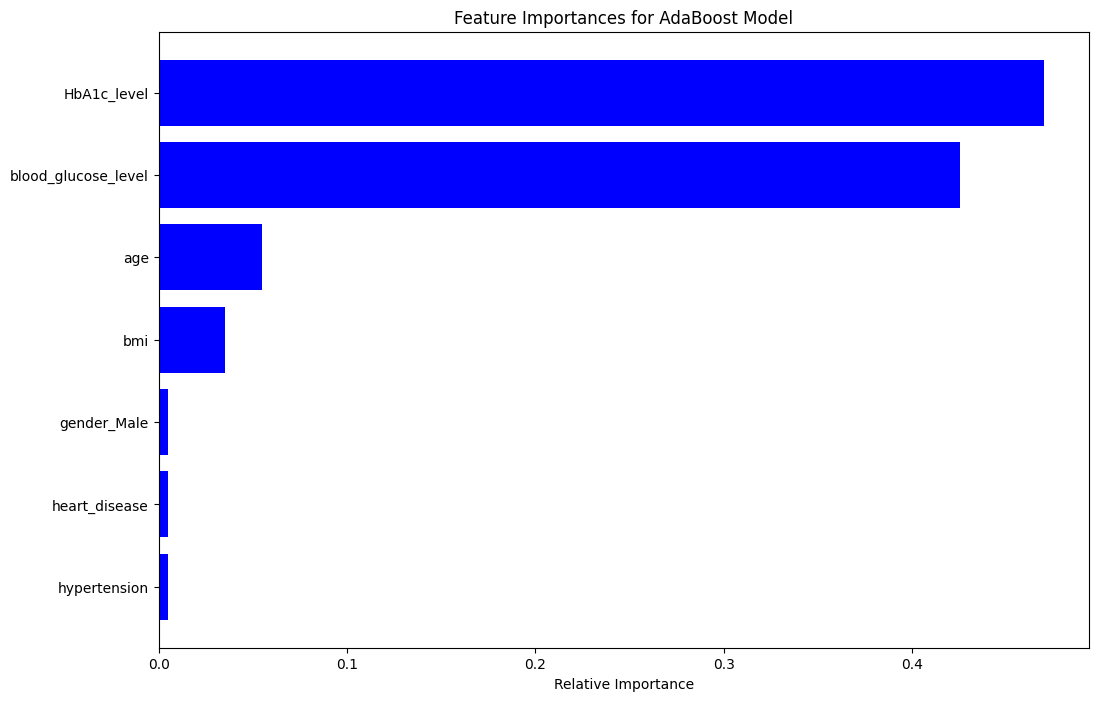

In [ ]:
# Get feature importances from the AdaBoost model
importances = ab.feature_importances_

# Get the indices of the features sorted by importance & their names
indices = np.argsort(importances)
features = np.array(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
                     'blood_glucose_level', 'gender_Male'])

# Plot
plt.figure(figsize=(12, 8))
plt.barh(range(X_train_balanced_optimal.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X_train_balanced_optimal.shape[1]), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances for AdaBoost Model')

plt.show()

### Thresholding for Final Model
Based on different clinical needs, different classification thresholds may be used. The AUC remains constant throughout thresholds, but business needs may lend to a higher tolerance for FPs vs. FNs or vica-versa.

In [ ]:
# Define the thresholds
thresholds = np.arange(0.35, 0.61, 0.03)

results = []

# Get TP, TN, FP, & FN at each threshold & append to results
for thresh in thresholds:
    adb_pred_class = (adb_pred_optimal > thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, adb_pred_class).ravel()
    results.append([thresh, tp, tn, fp, fn])

# Print results df
df_results = pd.DataFrame(results, columns=['Threshold', 'TP', 'TN', 'FP', 'FN'])
print(df_results)

   Threshold    TP     TN     FP    FN
0       0.35  2550      0  27450     0
1       0.38  2550    125  27325     0
2       0.41  2550   3827  23623     0
3       0.44  2550   4005  23445     0
4       0.47  2550  16794  10656     0
5       0.50  2036  26647    803   514
6       0.53  1722  27450      0   828
7       0.56   443  27450      0  2107
8       0.59   240  27450      0  2310


### Convert to PDF

In [ ]:
#!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "drive/My Drive/ADS 504 Final Project/Code Appendix.ipynb" ./
!jupyter nbconvert --to PDF "Code Appendix.ipynb"

[NbConvertApp] Converting notebook Code Appendix.ipynb to PDF
[NbConvertApp] Support files will be in Code Appendix_files/
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Making directory ./Code Appendix_files
[NbConvertApp] Writing 138912 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Ru